## **Jamboree Education**

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

My analysis should help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

### **Problem Statement**
- Identifying the most critical variables affecting graduate admissions.
- Understanding relationships between variables.
- Developing a predictive model to estimate admission chances based on available data.

### **Features of Dataset**

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

In [128]:
##Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
# Model
from sklearn.linear_model import LinearRegression
# split
from sklearn.model_selection import train_test_split
#from statsmodels.stats.outliers_influence import variance_inflation_factor
# Important metrics:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error, adjusted_mutual_info_score
from sklearn.feature_selection import f_regression
# Regularization techniques:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [129]:
#Reading dataset
df=pd.read_csv('Dataset\Jamboree_Admission.csv')
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\J'
<>:2: SyntaxWarning: invalid escape sequence '\J'
C:\Users\mohit\AppData\Local\Temp\ipykernel_32408\2664710388.py:2: SyntaxWarning: invalid escape sequence '\J'
  df=pd.read_csv('Dataset\Jamboree_Admission.csv')


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [130]:
df.shape

(500, 9)

#### **Descriptive Statistics**

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [132]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


- GRE Score:
    - Range: 290 to 340
    - Mean: 316.47, Std: 11.30
- TOEFL Score:
    - Range: 92 to 120
    - Mean: 107.19, Std: 6.08
- University Rating:
    - Range: 1 to 5
    - Mean: 3.11, Std: 1.14
- SOP and LOR:
    - Both range from 1.0 to 5.0 with similar means (~3.4) and standard deviations (~0.99).
- CGPA:
    - Range: 6.8 to 9.92
    - Mean: 8.58, Std: 0.60
- Chance of Admit:
    - Target variable ranges from 0.34 to 0.97.
    - Mean: 0.72, Std: 0.14
- Research:
    - Binary variable (0 or 1), with more students reporting research experience (mean: 0.56).

In [133]:
for i in df.columns:
    print(f"{i}: datatype is {df[i].dtype} and {df[i].nunique()} unique values ")
    print('The unique values are')
    print(df[i].unique())
    print(f"Number of null values: {df[i].isna()}")
    print(f"Data type: {df[i].dtype}")

    print('-'*90)

Serial No.: datatype is int64 and 500 unique values 
The unique values are
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 

- No missing values in the dataset
- Some variables like "University Rating," "SOP," and "LOR" might benefit from being treated as categorical or ordinal.

In [134]:
# Dropping serial number column
df = df.drop(columns=['Serial No.'])

# Shape of the dataset
shape = df.shape

df,shape

(     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
 0          337          118                  4  4.5   4.5  9.65         1   
 1          324          107                  4  4.0   4.5  8.87         1   
 2          316          104                  3  3.0   3.5  8.00         1   
 3          322          110                  3  3.5   2.5  8.67         1   
 4          314          103                  2  2.0   3.0  8.21         0   
 ..         ...          ...                ...  ...   ...   ...       ...   
 495        332          108                  5  4.5   4.0  9.02         1   
 496        337          117                  5  5.0   5.0  9.87         1   
 497        330          120                  5  4.5   5.0  9.56         1   
 498        312          103                  4  4.0   5.0  8.43         0   
 499        327          113                  4  4.5   4.5  9.04         0   
 
      Chance of Admit   
 0                0.92  
 1          

## **Univariate Analysis**
Converting these two columns to categorical values
- University Rating:

    - It is already an ordinal variable (1 to 5). Treating it as categorical reflects its discrete nature, where higher values represent better rankings.
- Research:

    - It is binary (0 or 1), which makes it naturally categorical.

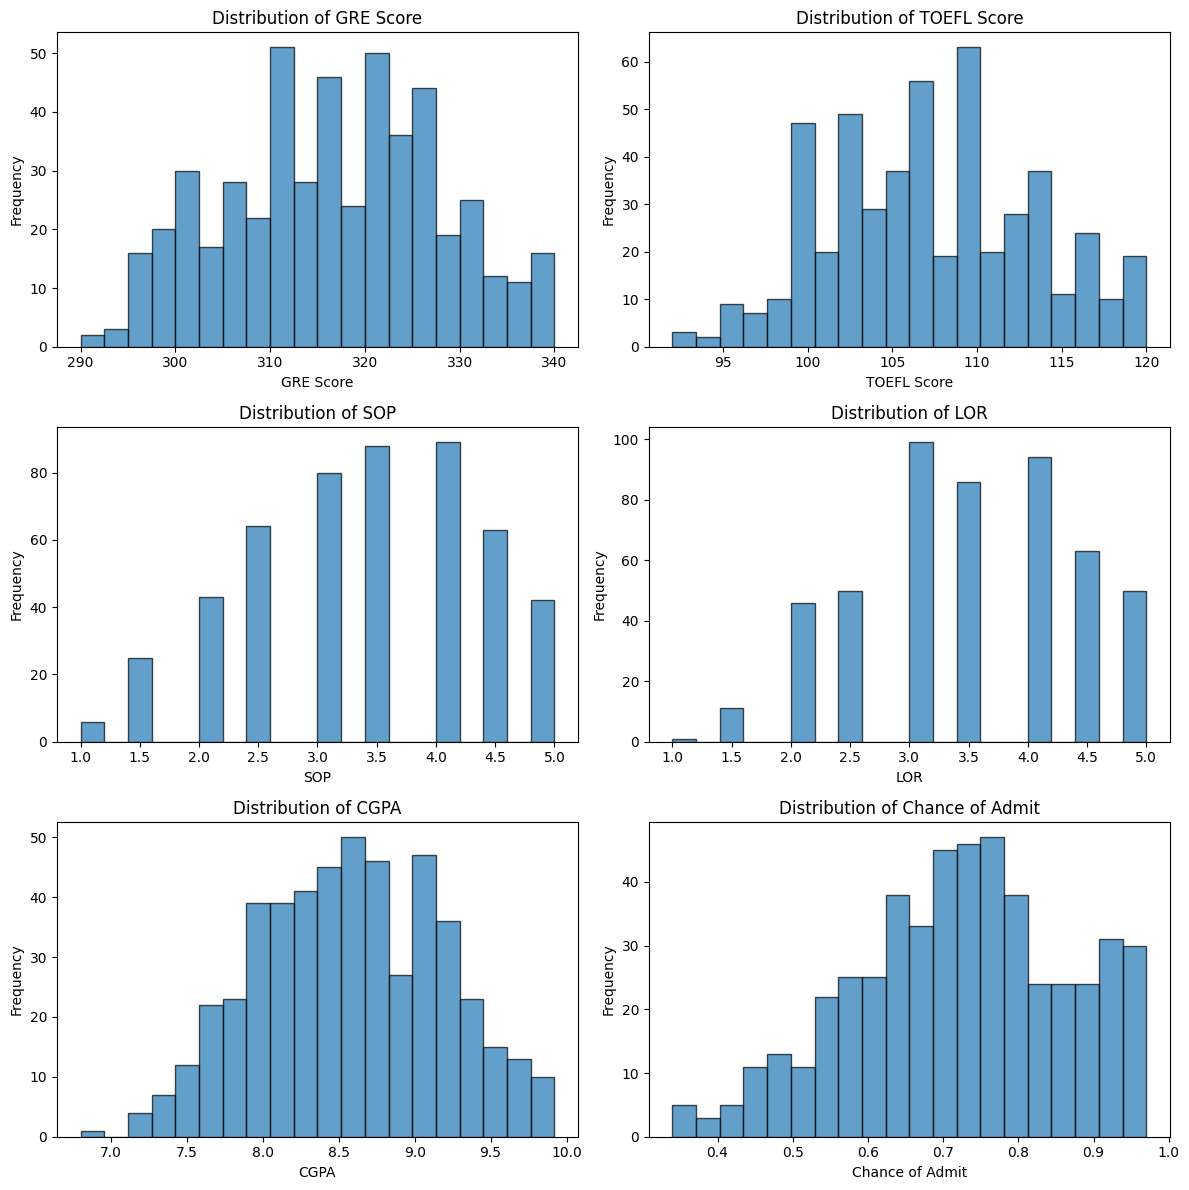

In [135]:
continuous_vars = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA', 'Chance of Admit']
categorical_vars = ['University Rating', 'Research']

df.columns = df.columns.str.strip()

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

# Continuous Variables
for idx, var in enumerate(continuous_vars):
    axes[idx].hist(df[var], bins=20, edgecolor='k', alpha=0.7)
    axes[idx].set_title(f'Distribution of {var}')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Frequency')

# Adjust layout for continuous variable plots
plt.tight_layout()
plt.show()



- ### **Univariate Analysis Subplots Insights**
    - **Continuous Variables:**
        - **GRE Score, TOEFL Score, and CGPA:**

            - These variables exhibit near-normal distributions, with a peak around competitive scores and GPAs.
        - **SOP and LOR:**

            - Uniformly distributed, showing diverse applicant strengths.
        - **Chance of Admit:**

            - Slight left skew, indicating many applicants have moderate to high chances of admission.

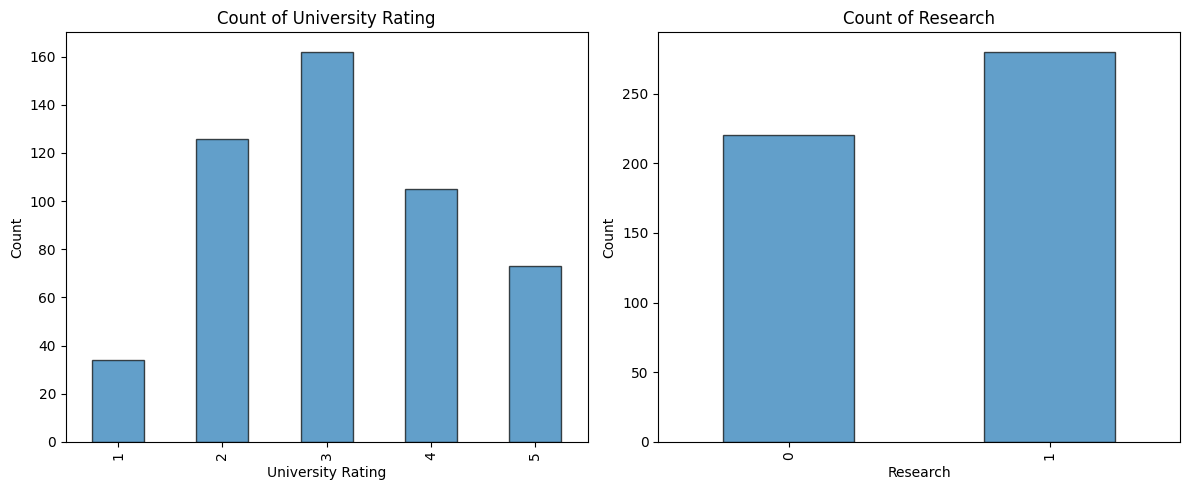

In [136]:
# Categorical Variables in Subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes = axes.flatten()

for idx, var in enumerate(categorical_vars):
    df[var].value_counts().sort_index().plot(kind='bar', ax=axes[idx], edgecolor='k', alpha=0.7)
    axes[idx].set_title(f'Count of {var}')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Count')

# Adjust layout for categorical variable plots
plt.tight_layout()
plt.show()

- Categorical Variables:
    - University Rating:
    
        - Most applicants aim for universities rated 3, 4, or 5, with fewer targeting lower-rated universities.
    - Research Experience:
     
        - Slightly more applicants report having research experience.

### **Bivariate Analysis**

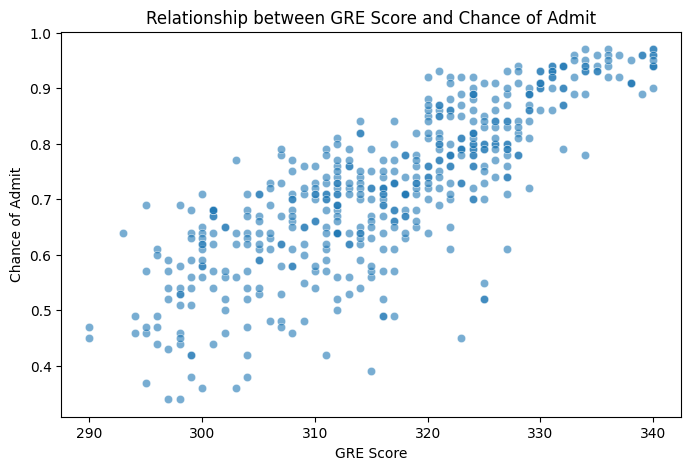

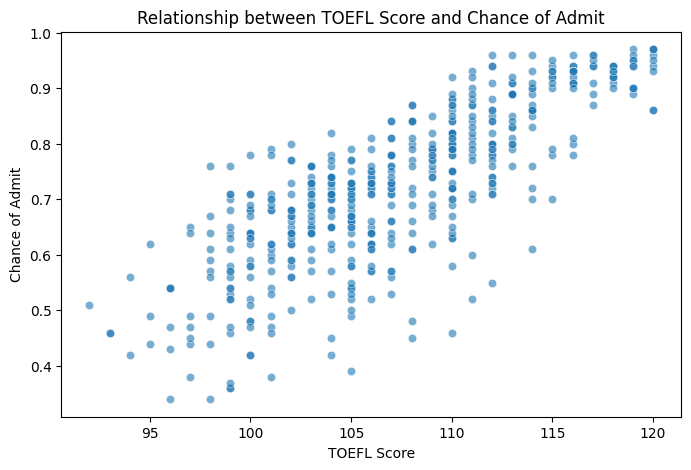

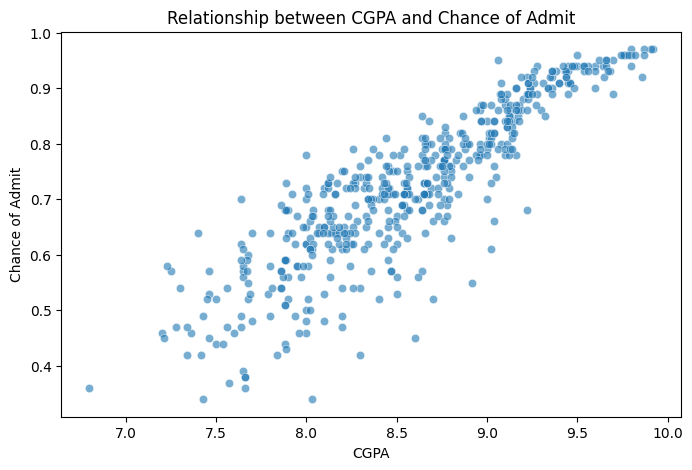

In [137]:
# Bivariate Analysis: Scatter plots for continuous variables against Chance of Admit
continuous_predictors = ['GRE Score', 'TOEFL Score', 'CGPA']
for var in continuous_predictors:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=var, y='Chance of Admit', alpha=0.6)
    plt.title(f'Relationship between {var} and Chance of Admit')
    plt.xlabel(var)
    plt.ylabel('Chance of Admit')
    plt.show()

- Continuous Variables:
    - GRE Score vs. Chance of Admit:

        - Positive correlation observed. Higher GRE scores tend to lead to higher admission chances.
        - Admission probability increases significantly for scores above 320.
    - TOEFL Score vs. Chance of Admit:

        - Similar positive trend. Higher TOEFL scores correspond to increased admission chances.
        - Scores above 110 show a strong likelihood of admission.
    - CGPA vs. Chance of Admit:
 
        - Strong positive correlation. Higher CGPAs are associated with higher admission probabilities.
        - CGPAs above 9 exhibit the highest chances.

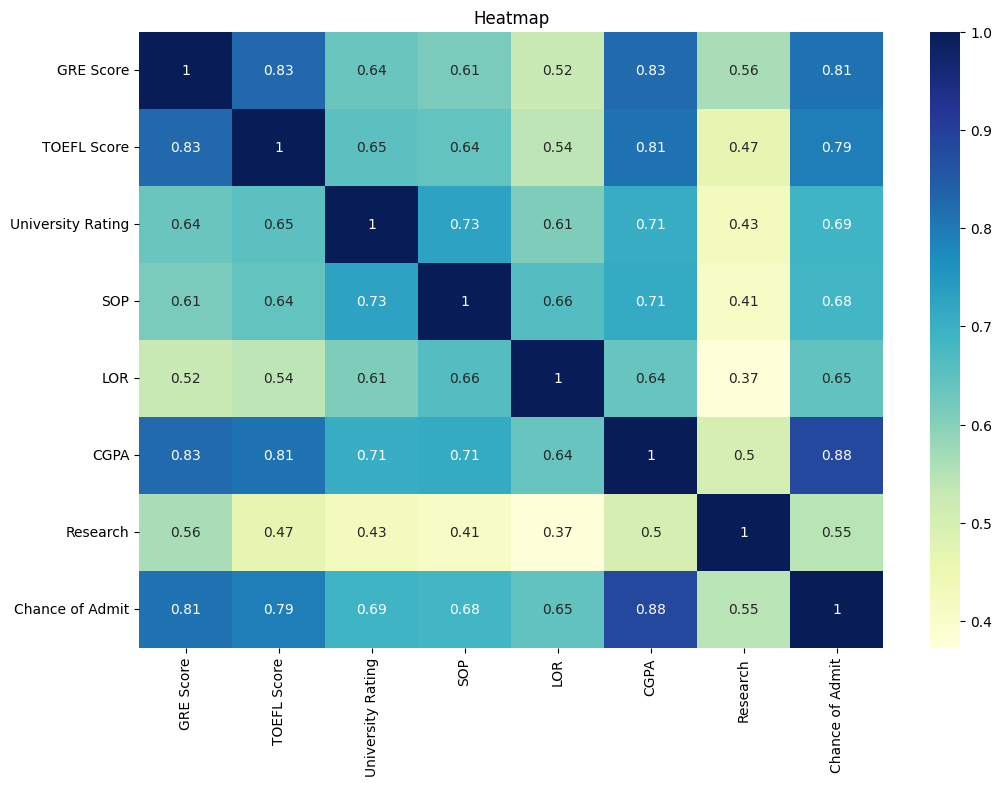

In [138]:
#Bivariate
#Correlation
plt.figure(figsize=(12,8))
df_corr = df.corr()
sns.heatmap(df_corr, cmap='YlGnBu', annot=True)
plt.title('Heatmap')
plt.show()

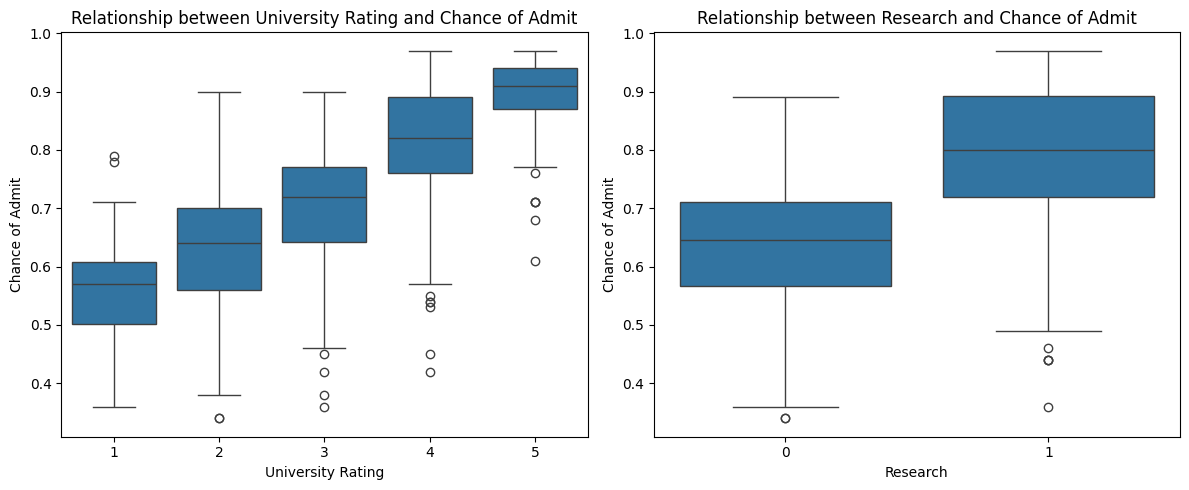

In [139]:
# Bivariate Analysis: Box plots for categorical variables against Chance of Admit

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes = axes.flatten()

# Categorical Variables vs Chance of Admit
for idx, var in enumerate(categorical_vars):
    sns.boxplot(data=df, x=var, y='Chance of Admit', ax=axes[idx])
    axes[idx].set_title(f'Relationship between {var} and Chance of Admit')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Chance of Admit')

# Adjust layout
plt.tight_layout()
plt.show()

- University Rating:

    - Median admission chances rise with higher university ratings. Top-rated universities (4-5) yield significantly better odds.
- Research Experience:

    - Applicants with research experience have higher chances of admission compared to those without.

---
### **Data Pre-processing**

In [140]:
#Duplicate value check
df.duplicated().sum()

0

In [141]:
#Missing value treatment
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [142]:
#Outlier treatment
outliers = {}
for var in ['GRE Score', 'TOEFL Score', 'CGPA', 'SOP', 'LOR']:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[var] = ((df[var] < lower_bound) | (df[var] > upper_bound))
outliers

{'GRE Score': 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 495    False
 496    False
 497    False
 498    False
 499    False
 Name: GRE Score, Length: 500, dtype: bool,
 'TOEFL Score': 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 495    False
 496    False
 497    False
 498    False
 499    False
 Name: TOEFL Score, Length: 500, dtype: bool,
 'CGPA': 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 495    False
 496    False
 497    False
 498    False
 499    False
 Name: CGPA, Length: 500, dtype: bool,
 'SOP': 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 495    False
 496    False
 497    False
 498    False
 499    False
 Name: SOP, Length: 500, dtype: bool,
 'LOR': 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 495    False
 496    False
 497    False
 498    False
 499    False
 Name: LOR, L

### **Model Creation**

In [143]:
df1 = df.copy()

In [144]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df1), columns = df.columns)

In [145]:
x = scaled_df.iloc[:,:-1]
y = scaled_df.iloc[:,-1]
print(x.shape , y.shape)

(500, 7) (500,)


In [146]:
# Split the data into training and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (400, 7)
Shape of x_test: (100, 7)
Shape of y_train: (400,)
Shape of y_test: (100,)


#### **Model Building**

In [147]:

lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [148]:
# Predicting values for the training and test data
y_pred_train = lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)

In [149]:
# Check the r2 score on trian data:
print('R2-Score On Train data:', r2_score(y_train, lr_model.predict(x_train)))

# Check the r2 score on test data:
print('R2-Score on Test data:', r2_score(y_test, lr_model.predict(x_test)))

R2-Score On Train data: 0.8210671369321554
R2-Score on Test data: 0.8188432567829627


In [150]:
#Feature's coefficient and intercept
lr_model_weights = pd.DataFrame(lr_model.coef_.reshape(1,-1),columns=df.columns[:-1])
lr_model_weights["Intercept"] = lr_model.intercept_
lr_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.194823,0.129095,0.020812,0.012735,0.113028,0.482199,0.084586,0.007736


- Model performance evaluation 
    - Metrics - MAE, RMSE, R2, Adj R2


In [151]:
def model_evaluation(y_actual, y_forecast, model):
    n = len(y_actual)
    if len(model.coef_.shape)==1:
        p = len(model.coef_)
    else:
        p = len(model.coef_[0])
        
    MSE = np.round(mean_squared_error(y_true= y_actual,y_pred = y_forecast,squared=True),2)
    MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_forecast),2)
    RMSE = np.round(mean_squared_error(y_true=y_actual,y_pred=y_forecast, squared=False),2)
    r2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast),2)
    adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),2)
    
    return print(f"MSE: {MSE}\nMAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nAdjusted R2: {adj_r2}")

In [152]:
model_evaluation(y_train.values, y_pred_train, lr_model)

MSE: 0.18
MAE: 0.3
RMSE: 0.42
R2 Score: 0.82
Adjusted R2: 0.82


C:\Users\mohit\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\mohit\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [153]:
model_evaluation(y_test.values, y_pred_test, lr_model)

MSE: 0.19
MAE: 0.3
RMSE: 0.43
R2 Score: 0.82
Adjusted R2: 0.81


C:\Users\mohit\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\mohit\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- Since there is `No difference` in the loss scores of training and test data, we can conclude that there is `No overfitting` of the model.

#### **Testing the assumptions**
1. Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)

In [154]:
# pip install statsmodels

In [155]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [156]:
x_t = pd.DataFrame(x_train, columns = df1.columns[:7])
vif = pd.DataFrame()
vif['features'] = x_t.columns
vif['vif'] = [variance_inflation_factor(x_t.values, i) for i in range(x_t.shape[1])]

In [157]:
vif

,features,vif
0,GRE Score,4.489201
1,TOEFL Score,3.665067
2,University Rating,2.571847
3,SOP,2.785753
4,LOR,1.977668
5,CGPA,4.653698
6,Research,1.517206


- All the vif (Variance inflatioin factor are below 5 , Thus data does not have very high multicolinearity)
#### **The mean of residuals is nearly zero**

In [158]:
#Calculate residuals for train
residual_tr = (y_train - y_pred_train)
residual_tr.mean()

1.0547118733938987e-17

In [159]:
# Calculate residuals for test:
residual_tst = (y_test - y_pred_test)
residual_tst.mean()

-0.03867840379282763

- Since the mean of residuals is very close to 0, we can say that the model is UnBiased.


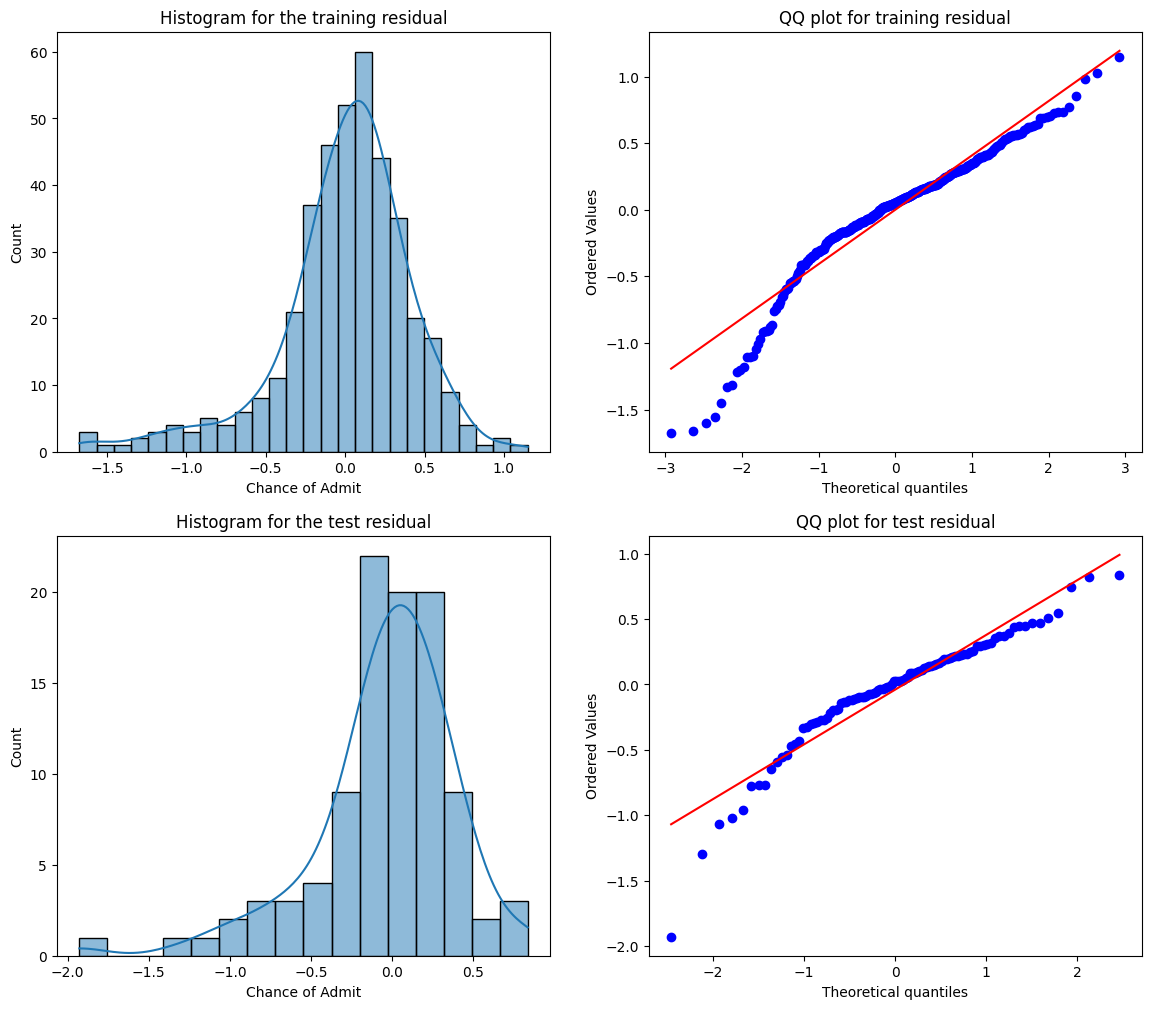

In [160]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
sns.histplot(residual_tr,kde = True)
plt.title('Histogram for the training residual')

plt.subplot(2,2,2)
stats.probplot(residual_tr, plot = plt)
plt.title('QQ plot for training residual')


plt.subplot(2,2,3)
sns.histplot(residual_tst,kde = True)
plt.title('Histogram for the test residual')

plt.subplot(2,2,4)
stats.probplot(residual_tst, plot = plt)
plt.title('QQ plot for test residual')

plt.show()

- From the Histplot & kdeplot for the test data , we can see that the Residuals are left skewed and not perfectly normally distributed.

- The QQ plot shows that residuals are slightly deviating from the straight diagonal , thus not Gaussian.

**Conclusion:**
- By examing the difference between the y_actual and y_predicted value, it is observed that the mean of the Errors are approximately been vary close to Zero.
- Which suggests that, on average, the model is not systematically underestimating or overestimating the target variable. A mean residual close to zero indicates that the model is making predictions that are, on average, accurate.

#### **Linearity of variables (no pattern in the residual plot)**

- Linearity of variables refers to the assumption that there is a linear relationship between the independent variables and the dependent variable in a regression model.
- It means that the effect of the independent variables on the dependent variable is constant across different levels of the independent variables.

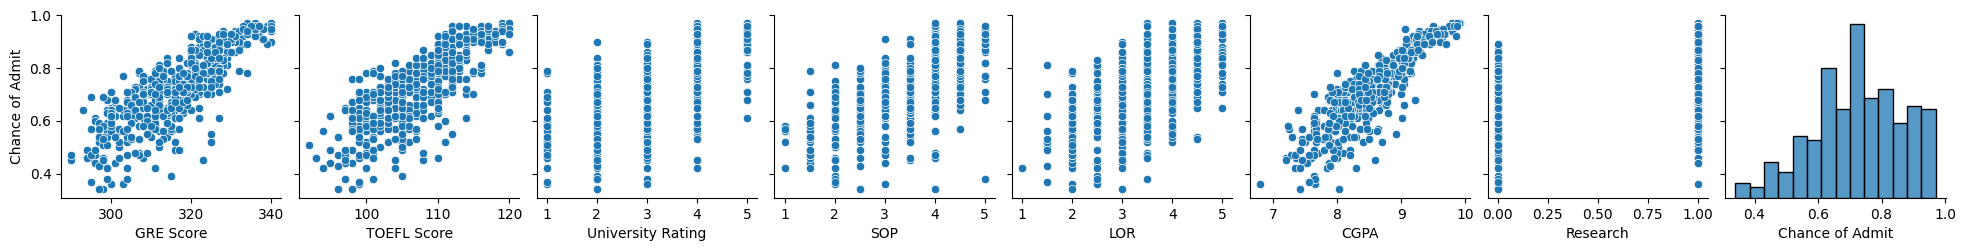

In [165]:
sns.pairplot(df1,y_vars = ['Chance of Admit'])
plt.show()

- From the Joint plot & pairplot in the graphical analysis, we can say that there is linear relationship between dependent variable and independent variables.

- As we can observe, GRE Score, TOEFL Score and CGPA have a linear relationship with the Chance of Admit. Although GRE score and TOEFL score are more scattered, CGPA has a much more more linear relationship with the Chance of Admit.

#### **Test of homoscedasticity (Plotting y_predicted and residuals)**

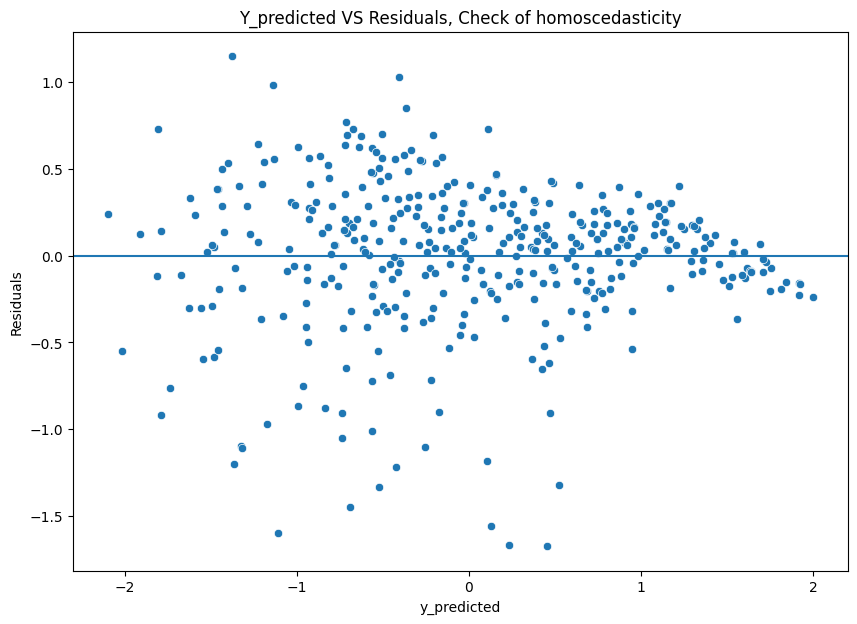

In [166]:
# y_predict = y_predict.reshape(-1)
# residual = residual.reshape(-1)
residual = residual_tr
plt.figure(figsize=(10,7))
sns.scatterplot(x = y_pred_train, y = residual)
plt.xlabel('y_predicted')
plt.ylabel('Residuals')
plt.axhline(y=0)
plt.title("Y_predicted VS Residuals, Check of homoscedasticity")
plt.show()

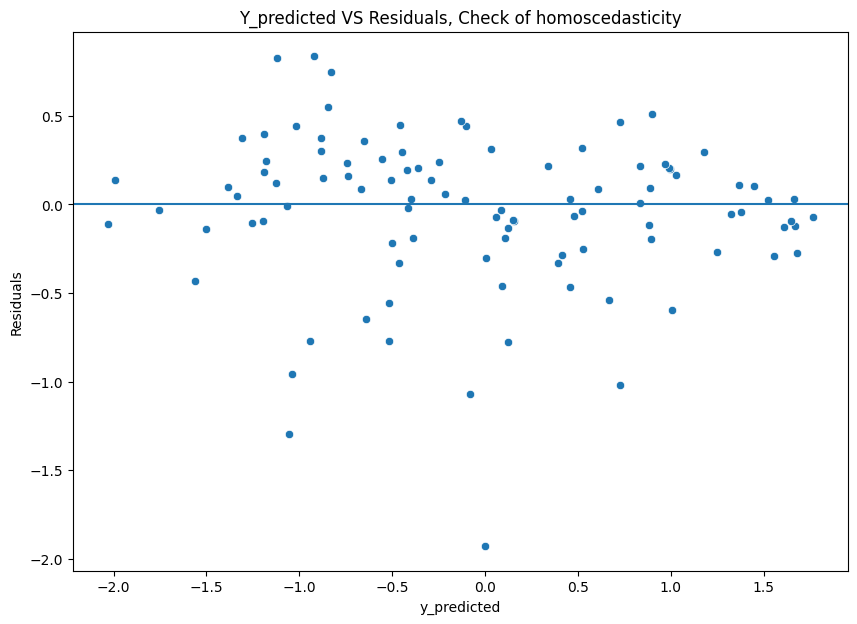

In [167]:

# y_predict = y_predict.reshape(-1)
# residual = residual.reshape(-1)
residuals = residual_tst
plt.figure(figsize=(10,7))
sns.scatterplot(x = y_pred_test, y = residuals)
plt.xlabel('y_predicted')
plt.ylabel('Residuals')
plt.axhline(y=0)
plt.title("Y_predicted VS Residuals, Check of homoscedasticity")
plt.show()

### **Actionable Insights and Recommendations :**
- First column was observed as unique row identifier which was dropped and was not required for model building.

- University Rating , SOP and LOR strength and research are seems to be discrete random Variables , but also ordinal numeric data.

- All the other features are numeric, ordinal and continuous.

- No null values were present in data.

- No Significant amount of outliers were found in data.

- Chance of admission(target variable) and GRE score(an independent feature) are nearly normally distrubted.

- Independent Variables (Input data): GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research

- Target/Dependent Variable : Chance of Admit (the value we want to predict)

- From correlation heatmap , we can observe GRE score, TOEFL score and CGPA have very high correlation with Change of admission.

- University rating, SOP ,LOR and Research have comparatively slightly less correlated than other features.

- Chances of admit is a probability measure , which is within 0 to 1 which is good (no outliers or missleading data in column).

- Range of GRE score looks like between 290 to 340.

- Range of TOEFL score is between 92 to 120.

- University rating , SOP and LOR are distributed between range of 1 to 5.

- CGPA range is between 6.8 to 9.92.

- From boxplots (distribution of chance of admition (probability of getting admition) as per GRE score ) : with higher GRE score , there is high probability of getting an admition .

- Students having high toefl score , has higher probability of getting admition .

- From count plots, we can observe , statement of purpose SOP strength is positively correlated with Chance of Admission .

- We can also similar pattern in Letter of Recommendation Stength and University rating , have positive correlation with Chaces of Admission .

- Student having research has higher chances of Admission , but also we can observe some outliers within that caregory.

#### **Regression Analysis :**

- From the above bar chart and REPORT file, We can observe that CGPA is the most important feature for predicting the chances of admission.
- Apart from CGPA other important features are GRE and TOEFL score.
- When analysing the assumption for linear regression, check for Multicolinearity, Observation: Getting all the VIF scores below 5 , shows there's no high multicolinearity.
- All the residuals are not perfectly normally distributed. and so residual plot we can observe some level of heteroscedasticity. Our Model shows very similar metrics just like other model metrics.

### **Recommendations**
- The education institute can help the student to improve their GRE Score and CGPA. Still, in addition, they can also assist them in writing good LOR and SOP thus increasing the chances of getting a better University.

- Launch monthly survey and work on the feedback provided.

**Awareness of CGPA and Research Capabilities** :

- To increase awareness regarding CGPA and Research capabilities for increasing the chance of admission Seminars can be organised.

- Any student can never change their current state of attributes so awareness and marketing campaigns need to be surveyed hence creating a first impression on students at the undergraduate level, which won't just increase the company's popularity but will also help students get prepared for plans in advance.

- An interactive dashboard can be created for applicants whenever they log in to your website, hence allowing healthy competition also to create a progress report for students.

- Daily blogs should be published so that applicants Stay informed about emerging trends.

- Additional features like several hours they put in studying, watching lectures, assignments solved percentage, and marks in mock tests can result in a better report for every student to judge themselves and improve on their own.